In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle('/content/drive/MyDrive/Courses /Старт ИИ/14.Линейная регрессия/newpeng.pkl')
data = data.rename(columns={
    'species': 'вид',
    'island': 'остров',
    'bill_length_mm': 'длина клюва',
    'bill_depth_mm': 'ширина клюва',
    'flipper_length_mm': 'длина плавника',
    'body_mass_g': 'масса тела',
    'sex': 'пол'
})

In [3]:
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [55]:
class MyLinearRegression:


    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        if len(X.shape) == 1:
            ones = np.ones((X.shape[0]))
            X = np.vstack([ones, X])
        else:
            ones = np.ones((X.shape[0], 1))
            X = np.hstack([ones, X])
        k = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        
        self.coef_ = k[1:]
        self.intercept_ = k[0]
        
    
    def predict(self, X):
        X = np.array(X)
        ones = np.ones((X.shape[0], 1))
        X = np.hstack([ones, X])
        y = np.vstack([self.intercept_, self.coef_.T])
        
        return (X @ y).reshape((-1))

In [21]:
X = data[['длина плавника']]
y = data['длина клюва']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

(283,)

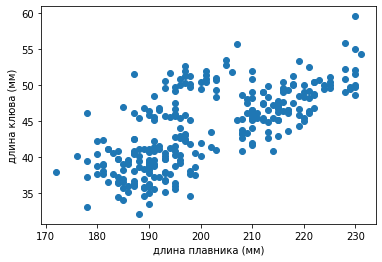

In [ ]:
plt.scatter(X_train, y_train)

plt.xlabel('длина плавника (мм)');
plt.ylabel('длина клюва (мм)');

plt.show()

In [56]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)

In [57]:
my_lr.coef_, my_lr.intercept_

(array([0.25284814]), -6.667862001963128)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([0.25284814]), -6.667862001964998)

In [59]:
lr.predict(X_test)

array([40.86758901, 41.3732853 , 46.43024817, 46.43024817, 44.40746302,
       44.66031117, 41.3732853 , 49.4644259 , 42.89037416, 41.12043716,
       43.39607045, 41.87898159, 42.13182973, 42.13182973, 43.14322231,
       41.62613344, 43.90176674, 42.63752602, 40.61474087, 49.97012219,
       39.09765201, 40.61474087, 43.64891859, 47.69448889, 45.4188556 ,
       41.62613344, 40.61474087, 42.63752602, 44.15461488, 45.67170374,
       48.95872961, 43.39607045, 42.13182973, 47.69448889, 48.20018518,
       46.43024817, 38.84480386, 47.18879261, 41.12043716, 41.3732853 ,
       48.70588147, 40.86758901, 47.18879261, 43.39607045, 46.68309632,
       47.18879261, 40.61474087, 42.63752602, 41.12043716, 51.2343629 ])

In [60]:
my_lr.predict(X_test)

array([40.86758901, 41.3732853 , 46.43024817, 46.43024817, 44.40746302,
       44.66031117, 41.3732853 , 49.4644259 , 42.89037416, 41.12043716,
       43.39607045, 41.87898159, 42.13182973, 42.13182973, 43.14322231,
       41.62613344, 43.90176674, 42.63752602, 40.61474087, 49.97012219,
       39.09765201, 40.61474087, 43.64891859, 47.69448889, 45.4188556 ,
       41.62613344, 40.61474087, 42.63752602, 44.15461488, 45.67170374,
       48.95872961, 43.39607045, 42.13182973, 47.69448889, 48.20018518,
       46.43024817, 38.84480386, 47.18879261, 41.12043716, 41.3732853 ,
       48.70588147, 40.86758901, 47.18879261, 43.39607045, 46.68309632,
       47.18879261, 40.61474087, 42.63752602, 41.12043716, 51.2343629 ])

In [42]:
np.vstack([2,1])

array([[2],
       [1]])